In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [46]:
data = datasets.load_iris()
X, Y = data.data, data.target
X.shape, Y.shape
np.mean(X, axis = 0).shape

array([0, 1, 2])

In [3]:
def LDA(X, Y, num_of_output_dimension):
    num_of_feature = X.shape[1]
    SW = np.zeros((num_of_feature, num_of_feature))
    SB = np.zeros((num_of_feature, num_of_feature))
    class_labels = np.unique(Y)
    
    whole_mean = np.mean(X, axis = 0)
    for c in class_labels:
        Xc = X[Y==c] # 150x4
        mean_c = np.mean(Xc, axis = 0)
        SW = SW + np.dot((Xc-mean_c).T,(Xc-mean_c)) #(Xc-classMean)T.(Xc-classMean)
        
        n_c = Xc.shape[0]
        mean_diff = (mean_c - whole_mean).reshape(num_of_feature, 1)
        SB += n_c * np.dot(mean_diff, mean_diff.T) #4x4
#     print(SB)
#     print(SW)
    # Determine SW^-1 * SB
    A = np.linalg.inv(SW).dot(SB)
    # Get eigenvalues and eigenvectors of SW^-1 * SB
    eigenvalues, eigenvectors = np.linalg.eig(A)
    eigenvectors = eigenvectors.T
    idxs = np.argsort(abs(eigenvalues))[::-1]
    eigenvalues = eigenvalues[idxs]
    eigenvectors = eigenvectors[idxs]
    return eigenvectors[0:num_of_output_dimension]
    
    

# Now we plot projected data points using W (With 1 & 2 projected dimension)

In [42]:
W = LDA(X, Y, 1)
print(W) #W is the weight matrix which can be used to project data points and classify them together. 
print(W.shape)

W1 = LDA(X, Y, 2)

[[-0.20874182 -0.38620369  0.55401172  0.7073504 ]]
(1, 4)


In [43]:
X_projected = np.dot(X, W.T)
X_projected1 = np.dot(X, W1.T)
print("Print projected shape: ", X_projected.shape)

Print projected shape:  (150, 1)


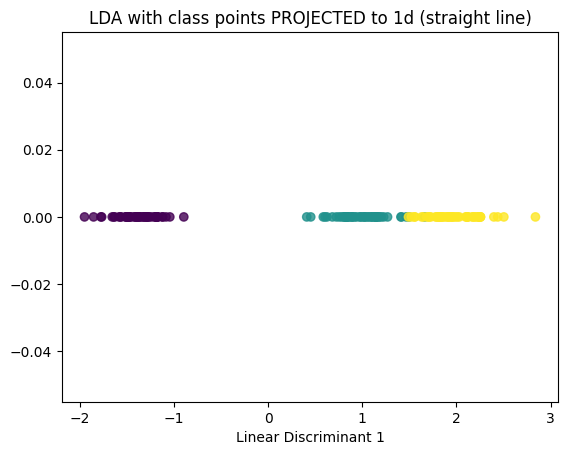

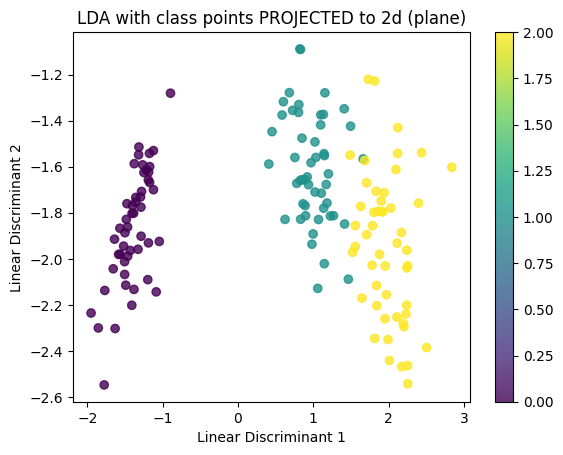

In [45]:
#plot

x1 = X_projected[:, 0]
plt.scatter(
    x1, [0] * len(x1), c=Y, alpha=0.8
)
plt.xlabel("Linear Discriminant 1")
plt.ylabel("")
plt.title("LDA with class points PROJECTED to 1d (straight line)")
plt.show()


x1, x2 = X_projected1[:, 0], X_projected1[:, 1] 
plt.scatter(
    x1, x2, c=Y, alpha=0.8
)
plt.xlabel("Linear Discriminant 1")
plt.ylabel("Linear Discriminant 2")
plt.title("LDA with class points PROJECTED to 2d (plane)")
plt.colorbar()
plt.show()